# Module 16 - Evaluating Data Models


**_Author: Jessica Cervi_**

**_Reviewer: Jessica Cervi_**

**Expected time = 2.5 hours**

**Total points = 100 points**

## Assignment Overview


This assignment will test your ability to implement an OLS (ordinary least squares) regression in Python. We'll briefly review some of the lecture content, followed by an overarching research question that will be guiding this assignment. Throughout the assignment, you will be asked to use the popular `scikit-learn`  libraries to implement your LS regression. You will also create several functions throughout the assignment in order to resolve problems and roadblocks to your analysis.

This assignment is designed to build your familiarity and comfort coding in Python while also helping you review key topics from each module. As you progress through the assignment, answers will get increasingly complex. It is important that you adopt a data scientist's mindset when completing this assignment. **Remember to run your code from each cell before submitting your assignment.** Running your code beforehand will notify you of errors and give you a chance to fix your errors before submitting. You should view your Vocareum submission as if you are delivering a final project to your manager or client. 

***Vocareum Tips***
- Do not add arguments or options to functions unless you are specifically asked to. This will cause an error in Vocareum.
- Do not use a library unless you are expicitly asked to in the question. 
- You can download the Grading Report after submitting the assignment. This will include feedback and hints on incorrect questions. 


### Learning Objectives

- Apply linear regression to a dataset in python
- Determine the input variables for a linear regression model
- Analyze the output of linear regression to form conclusions
- Work with classification and optimization models in python

----------


## Index: 

####  Module 16 - Evaluating Data Models

- [Question 1](#q1)
- [Question 2](#q2)
- [Question 3](#q3)
- [Question 4](#q4)
- [Question 5](#q5)
- [Question 6](#q6)
- [Question 7](#q7)
- [Question 8](#q8)
- [Question 9](#q9)
- [Question 10](#q10)
- [Question 11](#q11)
- [Question 12](#q12)
- [Question 13](#q13)
- [Question 14](#q14)
- [Question 15](#q15)
- [Question 16](#q16)
- [Question 17](#q17)
- [Question 18](#q18)
- [Question 19](#q19)
- [Question 20](#q20)

##  Module 16 - Evaluating Data Models

### Linear regression


Linear regression is widely used across industries including healthcare, economics, and social sciences. You can expect to frequently encounter data science questions in your career for which a linear regression is the best possible solution. 

#### Regression Equation
A regression analysis yields an equation similar to the slope of a line, which is a mathematical representation of the shape of how your input variables predict your output variables. It's often presented as follows:

$$Y = \alpha + \beta_1X_1 + \beta_2X_2 + e$$

$Y$, representing a value for your outcome variable, is predicted by the slope of the line $\alpha$ (alpha) plus a coefficient, $\beta$ (beta), multiplied by each $X$ value.

This is similar to $Y = mx + b$, the equation for the slope of a line that you probably learned in grade school math.

#### Statistical Assumptions
There are several key steps to take in order to produce accurate regression analysis results. Namely, your data needs to meet key *statistical assumptions*:

- **Linearity:** your data is linearly related, or can be transformed to create a linear relationship (i.e., take the square root of a predictor).
- **Multivariate normality:** the residuals produced by your output are normally distributed.
- **Little or no multicollinearity:** your predictors are independent and not highly correlated with each other.
- **Homoscedasticity:** equal variance of errors.

We will cover all of these in detail as we analyze the data set. 



## The dataset

For this assignment, we will use the `bank_marketing.csv` dataset. Because this dataset has many attributes, we list them below with a short description for your convenience.

### Input variables:

#### Bank client data:
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
 
#### Related with the last contact of the current campaign:

 - contact: contact communication type (categorical: 'cellular','telephone') 
 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Other attributes:

- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### social and economic context attributes

 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
 - cons.price.idx: consumer price index - monthly indicator (numeric) 
 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
 - euribor3m: euribor 3 month rate - daily indicator (numeric)
 - nr.employed: number of employees - quarterly indicator (numeric)

#### Desired target: Output variable 
- y - has the client subscribed a term deposit? (binary: 'yes','no')
```


Our goal will be to use scikitlearn to implement and refine a `LogisticRegression` model to predict the target feature -- `y`.  

In [146]:
#importing the necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [147]:
#Read the dataset
df = pd.read_csv('./data/bank_marketing.csv', index_col=0)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


[Back to top](#Index:) 
<a id='q1'></a>

### Question 1:

*5 points*
    

To begin, we will read in the data and get a high level overview of the data.  One thing we are looking for is outliers in the numerical features.  We use the `.describe()` method to examine the descriptive statistics of the column `age`.  Using a rule of thumb of outliers being defined as:

$$\text{mean} \pm 1.5\times \text{standard deviation}$$

Your goal is to examine the `age` column for outliers.

Define a function, `outlier_counter`. Your function should take as input a column name, as a string, and should return the count of outliers for that column.

Note that for your convenience, we have included some comments to guide through the steps when creating the function.

In [148]:
df.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

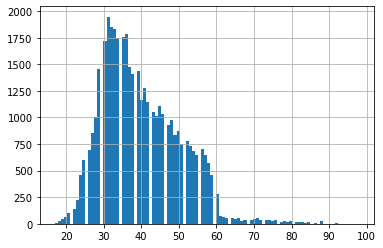

In [149]:
df['age'].hist(bins=100)

In [150]:
df1 = df['age']

In [151]:
df1.count()

41188

In [152]:
mean = df1.mean()

In [153]:
df1

0        44
1        53
2        28
3        39
4        55
         ..
41183    59
41184    31
41185    42
41186    48
41187    25
Name: age, Length: 41188, dtype: int64

In [154]:
std = df1.std()

In [155]:
col_range = [mean - 1.5 * (std), mean + 1.5 * (std)]

In [156]:
col_range

[24.39218543454241, 55.65593537734455]

In [157]:
(df['age'] < col_range[0]).sum() + (df['age'] > col_range[1]).sum() 

4650

In [158]:
col_range[1]

55.65593537734455

In [159]:
df1.count() - df1[(df1 > col_range[0]) & (df1 < col_range[1])].count()

4650

In [160]:
### GRADED

### YOUR SOLUTION HERE
def outlier_counter(column_name):

    #select column
    df_new = df[column_name]

    #determine mean
    c_mean = df_new.mean()
    
    #determine standard deviation
    c_std = df_new.std()
    
    #slice column by 1.5 times mean
    col_range = [c_mean - 1.5 * (c_std), c_mean + 1.5 * (c_std)]

    count_init = df_new.count()
    
    count_final = df_new[(df_new > col_range[0]) & (df_new < col_range[1])].count()
    
    #count how many rows were removed
    
    count_removed = count_init - count_final
    
    #return your answer
    return count_removed

###
### YOUR CODE HERE
###


In [161]:
outlier_counter('age')

4650

In [162]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q2'></a>

### Question 2:

*5 points*

Now, we want to examine the percentage of values in each of the target classes.  We can select the column `y` and use the `.value_counts()` method to get started.  Next, we need to divide by the length of the data to get a percentage.

Store your answer as a dictionary  named `ans2` with the key equal to the class label, and the corresponding value equal to the percentage of that class as a float value. For example:

```
ans3 = {
    0: 0.7,
    1: 0.3
}
```

The above would be comprised 70% with 0 labels and 30% with 1 label.

In [163]:
df['y'].value_counts()[0]/df['y'].count()

0.8873458288821987

In [164]:
df['y'].value_counts()[1]/df['y'].count()

0.11265417111780131

In [165]:
ans2 = {
    0: df['y'].value_counts()[0]/df['y'].count(),
    1: df['y'].value_counts()[1]/df['y'].count()
}

In [166]:
ans2

{0: 0.8873458288821987, 1: 0.11265417111780131}

In [167]:
### GRADED

### YOUR SOLUTION HERE
ans2 = {
    0: df['y'].value_counts()[0]/df['y'].count(),
    1: df['y'].value_counts()[1]/df['y'].count()
}

###
### YOUR CODE HERE
###


In [168]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q3'></a>

### Question 3:

*5 points*

In classification problems, we want to be aware of the proportion of data in each class.  If our data is **balanced**, we have equal amounts of each class, e.g. 50% class 0 and 50% class 1.  

Evaluate the truth of the following statement: "Our dataset has balanced classes." Assign a boolean of True or False to `ans3`.

In [169]:
### GRADED

### YOUR SOLUTION HERE
ans3 = False

###
### YOUR CODE HERE
###


In [170]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q4'></a>

### Question 4:

*5 points*

Now, we will prepare our data for a model. 

We realize that there are outliers in the data and that we have imbalanced classes, but let us proceed and see how a somewhat troubled Logistic Regression model can do. First, we will subset `df` to only numeric columns and separate the input from output features.

Save the numeric input features as a dataframe to the variable `X` and the target feature as a series to the variable `y` below.

In [171]:

df.select_dtypes(exclude=['object']).iloc[:, :-1]

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2
...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5


In [172]:
y = df['y']

In [173]:
type(y)

pandas.core.series.Series

In [174]:
### GRADED

### YOUR SOLUTION HERE
X = df.select_dtypes(exclude=['object']).iloc[:, :-1]
y = df['y']

###
### YOUR CODE HERE
###


In [175]:
X

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2
...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5


In [176]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q5'></a>

### Question 5:

*5 points* 
 
We want to evaluate our model on data that it has not seen before, so we will create a test/train split using the sklearn `train_test_split` method.  To ensure our results are the same, we will fix the `random_state` to 24. Use your `X` and `y` variables from above to create your new train and test sets and assign the partitions to `X_train`, `X_test`, `y_train`, and `y_test` below.

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2
...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5


In [177]:
### GRADED

# X['y'] = y

# train, test = train_test_split(X, test_size = 0.3, random_state=24)

# train, test = train_test_split(X, test_size = 0.3, random_state=24)
# x_train = train.iloc[0:,0:10]
# y_train = train['y']
# x_test = test.iloc[0:,0:10]
# y_test = test['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

### YOUR SOLUTION HERE
# X_train = None
# X_test = None
# y_train = None
# y_test = None

###
### YOUR CODE HERE
###


In [178]:
X_test.count()[0] - y_test.count()

0

In [179]:
X_train.count()[0] - y_train.count()

0

In [180]:
X_test.shape

(10297, 10)

In [181]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q6'></a>

### Question 6:

*5 points* 

With our data in hand, we create and fit the model.  Using the `LogisticRegression` class to instantiate the variable  `lgr`.

Next, fit a model with your *training data* from above using the `.fit()` method. When fitting the model, use the `lbfgs` solver. You should also make sure that your fitting converges (you may have to modify `max_iter` to do this).

For reproducibility, set `random_state =24`.

In [182]:
from sklearn.linear_model import LogisticRegression

In [183]:
### GRADED

### YOUR SOLUTION HERE
lgr = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=24)
lgr.fit(X_train, y_train)

###
### YOUR CODE HERE
###


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=24, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [184]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q7'></a>

### Question 7:

*5 points* 

After fitting the classifer, we can examine its performance using built in `.score()` method.  This is the percentage of predictions that were correct.  Evaluate your classifier using the scorer and determine if we have done better than just guessing the majority class.

Evaluate your model on the test set and compare your answer to that of the baseline majority class percentage.  Did your classifier perform better than simply guessing 0 every time? Assign a boolean to `ans7` below, with True being a higher accuracy than guessing 0 for every class.

In [185]:
### GRADED
lgr.score
print('Train R-Square:',lgr.score(X_train,y_train))
print('Test R-Square:',lgr.score(X_test,y_test))

### YOUR SOLUTION HERE
ans7 = True

###
### YOUR CODE HERE
###


Train R-Square: 0.9090026221229485
Test R-Square: 0.9104593570942993


In [186]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q8'></a>

### Question 8:

*5 points* 

Using the `.predict` method of the `LogisticRegression` class, _after fitting your model against your X train set_ , generate an array of predicted values against your `X_test` set, saving the result as a `numpy.ndarray` object into the `ans8` variable.

In [229]:
### GRADED

### YOUR SOLUTION HERE
ans8 = lgr.predict(X_train)

y_pred = ans8

###
### YOUR CODE HERE
###


In [230]:
ans9 = confusion_matrix(ans8, y_train)

In [231]:
type(ans8)

numpy.ndarray

In [232]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q9'></a>

### Question 9:

*5 points* 

By default, the sklearn `confusion_matrix` takes in an array of "true" y values, and an array of predictions from a model.  It returns a confusion matrix with the true 0 class represented in the first row, and true 1 class by the second.  The first column represents points labeled as 0 by the model, and the second column those that were labeled 1. The resulting answer should be a dataframe that looks similar to this: 

|.|0|1|
|---|---|---|
|0|123|456|
|1|789|876|



Use your true and predicted (computed in Question 8) values for `y`  to make a confusion matrix with the `confusion_matrix` method. Save your confusion matrix to `ans9`.

In [233]:
from sklearn.metrics import confusion_matrix

In [234]:
### GRADED

### YOUR SOLUTION HERE
ans9 = confusion_matrix(y_train, ans8)

###
### YOUR CODE HERE
###


In [235]:
ans9

array([[26717,   684],
       [ 2127,  1363]])

In [236]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Evaluating results

Consider the following fable:

> *A shepherd boy gets bored tending to the town's flock. To have some fun, he cries out, "Wolf!" even though no wolf is in sight. The villagers run to protect the flock, but then get really mad when they realize the boy was playing a joke on them.* 

Let's make the following definitions:

- "Wolf" is a positive class.
- "No wolf" is a negative class.


We can summarize our "wolf-prediction" model using a 2x2 confusion matrix that depicts all four possible outcomes:

![](./images/aesop.png)

A **true positive** is an outcome where the model correctly predicts the positive class. Similarly, a true negative is an outcome where the model correctly predicts the negative class.

A **false positive** is an outcome where the model incorrectly predicts the positive class. And a false negative is an outcome where the model incorrectly predicts the negative class.

As mentioned earlier, the `.score()` method uses **accuracy** to score the classifier.  This represents the percentage correct predictions:

$$Accuracy = \frac{TP + TN}{TP + FP + TN + FN}$$


For a deeper discussion on evaluation metrics please see the lectures this week and this [article](https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative).

[Back to top](#Index:) 
<a id='q10'></a>

### Question 10:

*5 points* 


In the language of the confusion matrix, our example translates to the following four outcomes.

- True Negatives: Classified as 0 and really 0
- False Positives: Classified as 1 and really 0
- False Negatives: Classified as 0 and really 1
- True Positives: Classified as 1 and really 1

We can save these values to compute additional evaluation metrics for our classifier.  

**RECALL** that by default, a `confusion_matrix` uses the labels that correspond with indicies of the matrix, i.e. row 0 column 0 is an object that was truly 0 and labeled as 0.  


Use this [example](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) to help you use the `confusion_matrix` function to save your classifiers performance on the test set in terms of:
- true negatives : tn
- false positives: fp
- false negatives: fn
- true positives: tp

In [237]:
### GRADED

(ans9.ravel())

### YOUR SOLUTION HERE
tn = None
fp = None
fn = None
tp = None

###
### YOUR CODE HERE
###

tn, fp, fn, tp = (ans9).ravel()


In [238]:
tn

26717

In [239]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q11'></a>

### Question 11:

*5 points* 


The notion of precision can also be described as the *positive predictive value* of a classifier.  We compute it using the true positives and false positives of the classifier.  

$$PPV = \frac{TP}{TP + FN}$$

Use your values to compute the precision of your classifier.  Save your answer to `ans11` below.

The formula above should read:
    
$$PPV = \frac{TP}{TP + FP}$$

In [240]:
### GRADED

### YOUR SOLUTION HERE
ans11 = tp / (tp + fp)

###
### YOUR CODE HERE
###


In [241]:
ans11

0.6658524670249145

In [242]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q12'></a>

### Question 12:

*5 points* 

Recall can be considered the *true positive rate* and  is computed as follows:

$$TPR = \frac{TP}{TP + FN}$$

Using your values from the confusion matrix, calculate the recall score on your test data.  Save your solution to 
`ans12` below.

In [243]:
### GRADED

### YOUR SOLUTION HERE
ans12 = tp / (tp + fn)

###
### YOUR CODE HERE
###


In [244]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q13'></a>

### Question 13:

*5 points* 

To make a plot of the the `ROC` curve, we will need to save the true positive rate and false positive rates along with the different values for thresholds that yield these.  In sklearn, we use the `roc_curve` method.  This takes in an array of true `y` values and a list from the `.decision_function` method of a fit `LogisticRegression` classifier. 

Use your fit `LogisticRegression` classifier to get the threshold values from the `decision_function()` method  on your X test data.  Save the results to  `ans13` below of type numpy.ndarray of shape (10297,).

In [247]:
y_test.shape

(10297,)

In [203]:
from sklearn.metrics import roc_curve

In [204]:
### GRADED

### YOUR SOLUTION HERE
ans13 = lgr.decision_function(X_test)


###
### YOUR CODE HERE
###


In [205]:
X_test.shape

(10297, 10)

In [206]:
ans13.shape

(10297,)

In [207]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q14'></a>

### Question 14:

*5 points* 

Now, we save the false positive rates and true positive rates together with their accompanying threshold values using the `roc_curve` method.

Save the false positive rate, the true positive rate, and threshold values below using the roc curve method and your `decison_funtion` from above. Name your variables `fpr`, `tpr` and `thresholds`.

**HINT:** These variables are NumPy arrays.

In [222]:
from sklearn.metrics import roc_curve

In [248]:
### GRADED

### YOUR SOLUTION HERE
# fpr = None
# tpr = None
# thresholds = None
(fpr, tpr, thresholds) = roc_curve(y_test, ans13)

###
### YOUR CODE HERE
###


In [226]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q15'></a>

### Question 15:

*5 points* 

Using these values, we can plot the ROC curve.  We want our false positive rates across the $x$-axis and true positive rates as the $y$-axis.  Your plot should resemble the one shown below.

![](./images/roc_ex.png)

Make a *unique* plot displaying `fpr` vs `tpr` and `tpr` vs `fpr` computed above. Save your plot as `plot15.png` in the `results` folder. Do not specify any other option when plotting.

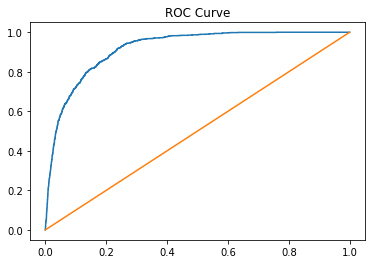

In [249]:
### GRADED

### YOUR SOLUTION HERE
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.title("ROC Curve")
plt.savefig('results/plot15.png')

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q16'></a>

### Question 16:

*5 points* 

To see how our labels are applied in making predictions, we can use the `.predict_proba()` method of our `LogisticRegression` classifier.  We are interested in the probabilities of predicting membership in class 1 which is the second column of the data.  

 Save the predicted probabilities of predicting class 1 to `ans16` below. Your answer should be of object type
 numpy.ndarray and shape (10297,)

In [268]:
### GRADED

### YOUR SOLUTION HERE
ans16 = lgr.predict_proba(X_test)[:,1]

###
### YOUR CODE HERE
###


In [269]:
ans16.shape

(10297,)

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q17'></a>

### Question 17:

*5 points* 

Now that we have our thresholds, we can adjust our predictions based on a different threshold than 0.5 -- the default value.  To do so, we will create a new array of predictions where we label anything greater than a 0.4 probability as a 1, and anything else as a 0.  

Use `np.where` together with  your solution to problem 16  to make predictions based on 0.4 threshold. Save your results to `ans17` below.

In [286]:
### GRADED

### YOUR SOLUTION HERE
ans17 = np.where(ans16 > 0.4, 1, 0)


###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q18'></a>

### Question 18:

*5 points* 



Now, we can compare our new predictions precision and recall scores.  We will use the built-in sklearn scorers from the `metrics` module to do so.

Use the predictions from question 17  to evaluate the performance of your new  classifier on the test data. Save the precision score to `ans18` below.

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
### GRADED

### YOUR SOLUTION HERE
ans18 = None

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q19'></a>

### Question 19:

*5 points* 

Similarly, we can use the `recall_score` to examine the recall performance of our new classifier.

 Evaluate the recall of your classifier  from problem 17 on the test set.  Save your solution to `ans19` below.

In [ ]:
### GRADED

### YOUR SOLUTION HERE
ans19 = None

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q19'></a>

### Question 20:

Now that we adjusted the threshold, we have improved one of our metrics and seen decline in the other.  Perhaps this is desirable, or maybe we should move the threshold the other way depending on our metrics and business setting.

What metric improved, `precision` or `recall`? Save your answer as a string to  `ans20` below

In [ ]:
### GRADED

### YOUR SOLUTION HERE
ans20 = 'precision'

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [221]:
%matplotlib inline

In [227]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error



In [228]:
cali = fetch_california_housing()

In [229]:
print(cali.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [230]:
# We could do this
#X, y = cali.data, cali.target

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [272]:
# instantiate

lr = LinearRegression()

lr.fit(X_train, y_train)

preds=lr.predict(X_test)
train_preds = lr.predict(X_train)

r2_test = lr.score(X_test, y_test)
r2_train = lr.score(X_train, y_train)
mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, preds)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
results_df = pd.DataFrame({'r2': [r2_test, r2_train], 
                           'Mean SE': [mse_test, mse_train], 
                           'Root MSE': [rmse_train, rmse]},
                         index = ['test','train'])

In [273]:
results_df

,r2,Mean SE,Root MSE
test,0.584589,0.56491,0.716331
train,0.611738,0.51313,0.751605


In [274]:
poly = PolynomialFeatures()
X_train_poly = poly.fit_transform(X_train)
# We only want to fit on the test
X_test_poly = poly.transform(X_test)

In [294]:
# instantiate

lr = LinearRegression()

lr.fit(X_train_poly, y_train)

preds=lr.predict(X_test_poly)
train_preds = lr.predict(X_train_poly)

r2_test = lr.score(X_test_poly, y_test)
r2_train = lr.score(X_train_poly, y_train)
mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, preds)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
results_df = pd.DataFrame({'r2': [r2_test, r2_train], 
                           'Mean SE': [mse_test, mse_train], 
                           'Root MSE': [rmse_test, rmse_train]},
                         index = ['test','train'])

In [295]:
results_df

,r2,Mean SE,Root MSE
test,0.603000,0.539872,0.734760
train,0.685824,0.415218,0.644374


In [277]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [289]:
from sklearn.preprocessing import PowerTransformer

power = PowerTransformer()
transformed_inputs = power.fit_transform(df)

ValueError: could not convert string to float: 'blue-collar'

In [286]:
#df_tranformed  = pd.DataFrame(transformed_inputs, columns=cali.feature_names)

In [288]:
# Select K best


In [297]:
pipe2 = Pipeline([('power', PowerTransformer()),
                  ('poly', PolynomialFeatures()),
                  ('select', SelectKBest()),
                  ('lr', LinearRegression())])

NameError: name 'SelectKBest' is not defined

### Classification

In [298]:
from sklearn.datasets import load_breast_cancer

In [299]:
cancer = load_breast_cancer

In [300]:
cancer

<function sklearn.datasets._base.load_breast_cancer(return_X_y=False)>

In [302]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [303]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [305]:
# We try to predict survived

In [306]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [307]:
X = titanic.iloc[:,1:10]

In [308]:
y = titanic.iloc[:, 0]

In [310]:
X = pd.get_dummies(X, drop_first=True)

In [311]:
X

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman
0,3,22.0,1,0,7.2500,1,0,1,0,1,1,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,1
2,3,26.0,0,0,7.9250,0,0,1,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1,1,0,1,0
887,1,19.0,0,0,30.0000,0,0,1,0,0,0,1
888,3,NaN,1,2,23.4500,0,0,1,0,1,0,1
889,1,26.0,0,0,30.0000,1,0,0,0,0,1,0


In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [313]:

# Use sklearn imputer to impute missing data

from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [316]:
pipe_class = Pipeline([('impute', SimpleImputer()),
                      ('select', SelectKBest(k=5)),
                       ('clf', LogisticRegression())])

NameError: name 'SimpleImputer' is not defined